In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,prefena,airconditioning,howaterheating,guestroom,basement,furnished
0,13300000,7420,4,2,3,2,1,1,1,0,0,0,1
1,12250000,8960,4,4,4,3,1,0,1,0,0,0,1
2,12250000,9960,3,2,2,2,1,1,0,0,0,1,0
3,12215000,7500,4,2,2,3,1,1,1,0,0,1,1
4,11410000,7420,4,1,2,2,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,0,0,0,1,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [4]:
df.count().isnull()

price              False
area               False
bedrooms           False
bathrooms          False
stories            False
parking            False
mainroad           False
prefena            False
airconditioning    False
howaterheating     False
guestroom          False
basement           False
furnished          False
dtype: bool

In [6]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,parking,mainroad,prefena,airconditioning,howaterheating,guestroom,basement,furnished


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,prefena,airconditioning,howaterheating,guestroom,basement,furnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.858716,0.234862,0.315596,0.045872,0.177982,0.350459,0.256881
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.424302,0.465180,0.209399,0.382849,0.477552,0.437314
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
correlation = df.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,mainroad,prefena,airconditioning,howaterheating,guestroom,basement,furnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.329777,0.452954,0.093073,0.255517,0.187057,0.229350
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.234779,0.222393,-0.009229,0.140297,0.047417,0.145772
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.079023,0.160603,0.046049,0.080549,0.097312,0.079054
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.063472,0.186915,0.067159,0.126469,0.102106,0.108139
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.044425,0.293602,0.018847,0.043538,-0.172394,0.093176
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.091627,0.159173,0.067864,0.037466,0.051497,0.131234
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.199876,0.105423,-0.011781,0.092337,0.044002,0.129971
prefena,0.329777,0.234779,0.079023,0.063472,0.044425,0.091627,0.199876,1.000000,0.117382,-0.059411,0.160897,0.228083,0.100249
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.117382,1.000000,-0.130023,0.138179,0.047341,0.160994
howaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.059411,-0.130023,1.000000,-0.010308,0.004385,-0.008472


<Axes: >

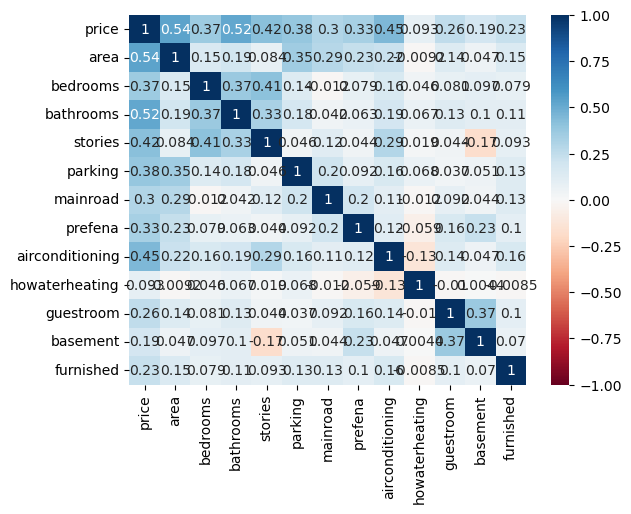

In [20]:
sns.heatmap(correlation, vmax = 1, vmin = -1, annot = True, cmap ="RdBu")

In [42]:
x = df.drop("price", axis = 1)
y = df["price"]


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit(x_test)

In [51]:
rf= RandomForestRegressor(n_estimators = 301)
rf.fit(x_train, y_train)
y1_pred = rf.predict(x_test)
y1_pred

array([3120555.81395349, 5577255.81395349, 3804383.72093023,
       6178391.62790698, 6245151.1627907 , 5106679.06976744,
       6736116.27906977, 4855848.8372093 , 3735720.93023256,
       5908162.79069767, 6074186.04651163, 5758139.53488372,
       5571720.93023256, 3188465.11627907, 3870162.79069767,
       6664953.48837209, 4007325.58139535, 4260813.95348837,
       3782375.58139535, 2600360.46511628, 3589901.29198966,
       6688372.09302326, 2204038.37209302, 5961093.02325581,
       3113046.51162791, 5578139.53488372, 3505651.1627907 ,
       3194186.04651163, 4085976.74418605, 3684256.97674419,
       3277162.79069767, 5525534.88372093, 3370232.55813953,
       3146226.74418605, 3768837.20930233, 4804162.79069767,
       3301953.48837209, 4851313.95348837, 2640945.73643411,
       4347116.27906977, 4148453.48837209, 5021709.30232558,
       5338302.3255814 , 5895162.79069767, 2777851.32890365,
       5828011.62790698, 7357151.1627907 , 4318895.34883721,
       3455651.1627907 ,

In [53]:
print(mean_squared_error(y1_pred, y_test))

1358364818200.1472


In [56]:
print(r2_score(y1_pred, y_test))

0.390651773190552


In [59]:
sv = SVR()
sv.fit(x_train, y_train)
y2_pred = sv.predict(x_test)
y2_pred

array([4339983.46121011, 4339983.18360795, 4340001.81813677,
       4340016.94398999, 4340038.88873581, 4339972.73560605,
       4340023.61633737, 4340000.18067248, 4340001.81812239,
       4340046.5043978 , 4340042.5468086 , 4339992.02358515,
       4340028.2903538 , 4340054.53021553, 4339985.75628784,
       4340058.16441169, 4340063.86304011, 4340007.40113884,
       4339970.04984655, 4339975.64096291, 4339992.18902703,
       4340018.85910168, 4339972.02171429, 4340036.85872837,
       4339987.40760181, 4339997.32345958, 4339978.4436154 ,
       4339983.46121607, 4339979.52532295, 4339977.40963254,
       4339983.46122191, 4340022.29057229, 4339999.9999678 ,
       4339972.98512233, 4340057.49457418, 4340015.41018019,
       4340004.58844403, 4340018.85909305, 4339985.75627176,
       4339990.87657263, 4339987.40760461, 4340005.52184804,
       4340028.29036973, 4340065.62529181, 4339969.10177008,
       4340005.24136886, 4340028.29038245, 4340000.00000166,
       4339988.95790778,

In [61]:
print(mean_squared_error(y2_pred, y_test))

3410212554338.901


In [62]:
print(r2_score(y2_pred, y_test))

-4223802257.466182


\Priciple Component Analysi


In [68]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
x_pca.shape

(545, 1)

In [69]:
x_pca_train, x_pca_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [70]:
rf.fit(x_pca_train, y_train)
y3_pred = rf.predict(x_pca_test)
y3_pred

array([2523850.        , 3526448.17275748, 3665325.58139535,
       8930760.        , 3139154.65116279, 3498220.93023256,
       3556395.34883721, 3212975.58139535, 7328195.81395349,
       4600906.97674419, 4289209.30232558, 3993372.09302326,
       5105980.62015504, 5555604.65116279, 6468898.60465116,
       4012992.24806202, 3624767.44186047, 6628081.39534884,
       5600953.48837209, 7623304.65116279, 2830916.27906977,
       3456511.62790698, 4298953.48837209, 3455806.58914729,
       3987209.30232558, 3931313.95348837, 5955976.74418605,
       4046383.72093023, 5266767.44186047, 4396453.48837209,
       6047534.88372093, 4231162.79069767, 6417127.90697674,
       6954209.30232558, 3883565.33776301, 5513069.76744186,
       3656822.48062015, 3279139.53488372, 4699906.97674419,
       4290697.6744186 , 4165069.76744186, 3744348.8372093 ,
       5267360.46511628, 3814324.41860465, 5584093.02325581,
       8128479.53488372, 5050988.37209302, 3909604.65116279,
       8607463.25581395,

In [71]:
print(mean_squared_error(y3_pred, y_test))

1573275446626.3572


In [72]:
print(r2_score(y3_pred, y_test))

0.22301943414001246


Predicting the Future Price by use of RandomForestRegressor

In [82]:
xnew = [[16109, 4, 4, 4, 3, 1, 1, 0, 0, 1,0,1]]
xnew= sc.transform(xnew)
y4_pred =rf.predict(xnew)
y4_pred

AttributeError: 'StandardScaler' object has no attribute 'mean_'